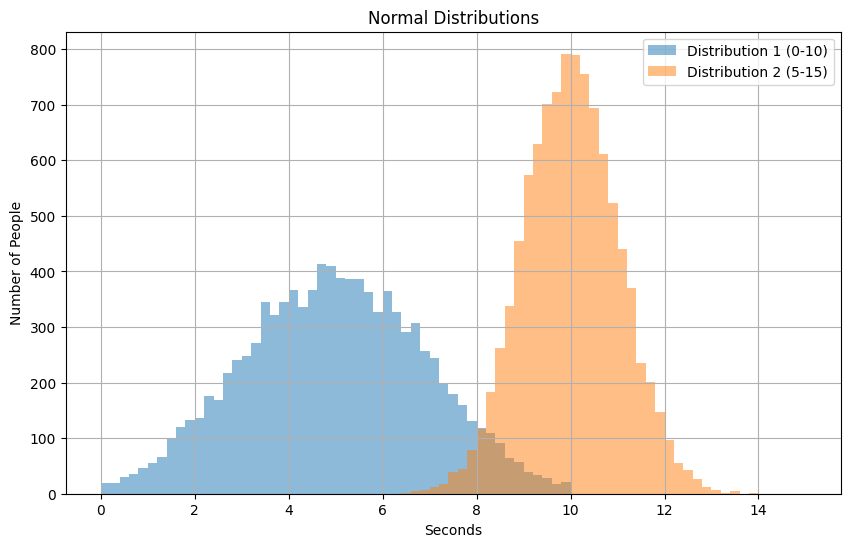

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the distributions
mean1, std1 = 5, 2   # For the distribution from 0 to 10
mean2, std2 = 10, 1  # For the distribution from 5 to 15
num_samples = 10000

# Generate random samples from the normal distributions
samples1 = np.random.normal(mean1, std1, num_samples)
samples2 = np.random.normal(mean2, std2, num_samples)

# Create histogram data
hist_data1, bins1 = np.histogram(samples1, bins=50, range=(0, 10))
hist_data2, bins2 = np.histogram(samples2, bins=50, range=(5, 15))

# Calculate bin centers
bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
bin_centers2 = (bins2[:-1] + bins2[1:]) / 2

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(samples1, bins=50, range=(0, 10), alpha=0.5, label='Distribution 1 (0-10)')
plt.hist(samples2, bins=50, range=(5, 15), alpha=0.5, label='Distribution 2 (5-15)')
plt.xlabel('Seconds')
plt.ylabel('Number of People')
plt.title('Normal Distributions')
plt.legend()
plt.grid(True)
plt.show()


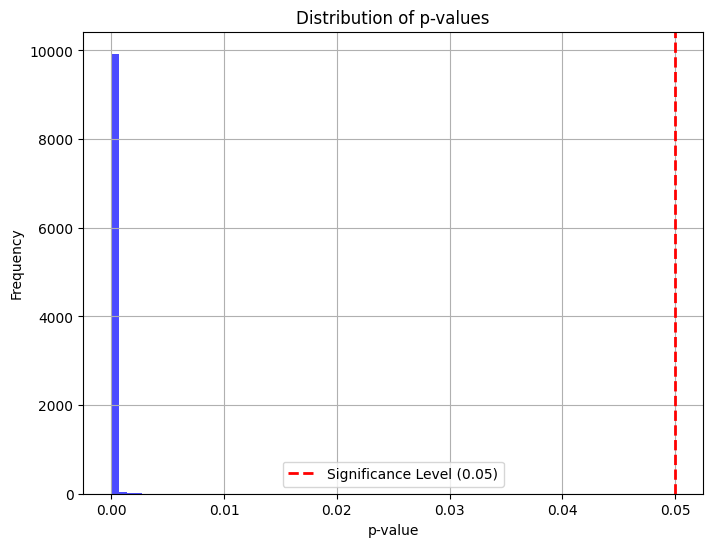

In [33]:
import numpy as np
from scipy.stats import ttest_ind

# Parameters for the distributions

num_samples = 10  # Number of samples to consider
p_values = [] 
for i in range(0,10000):
    # Assuming you already have samples1 and samples2 from the previous code
    random_indices1 = np.random.choice(len(samples1), num_samples, replace=False)
    random_indices2 = np.random.choice(len(samples2), num_samples, replace=False)
    chosen_samples1 = samples1[random_indices1]
    chosen_samples2 = samples2[random_indices2]


    # Perform two-sample t-test
    t_statistic, p_value = ttest_ind(chosen_samples1, chosen_samples2)
    p_values.append(p_value)
    
# Plotting the distribution of p-values
plt.figure(figsize=(8, 6))
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.axvline(x=0.05, color='red', linestyle='dashed', linewidth=2, label='Significance Level (0.05)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
p_values_less_than_0_05 = np.sum(np.array(p_values) < 0.05)
percentage_less_than_0_05 = (p_values_less_than_0_05 / 10000) * 100

# Print the results
print("Percentage of p-values less than 0.05:", percentage_less_than_0_05)

Percentage of p-values less than 0.05: 100.0


### Since we know that both the samples are coming from distributions which are actually significantly significant, we can also call the above number as the number of times we are getting True Positive.

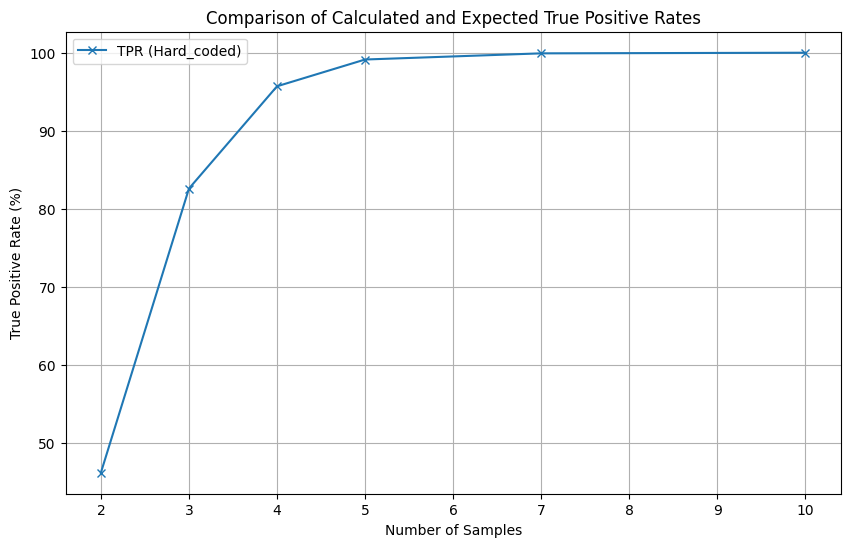

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Hard-coded dictionary with expected True Positive Rates
Hard_coded = {2: 46.2, 3: 82.6, 4: 95.7, 5: 99.13, 7: 99.92, 10: 100}


# Extract keys and values from the Hard_coded dictionary
sample_sizes = list(Hard_coded.keys())
tpr = list(Hard_coded.values())

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(sample_sizes, calculated_tpr, marker='o', label='Calculated TPR')
plt.plot(sample_sizes, expected_tpr, marker='x', label='TPR (Hard_coded)')
plt.xlabel('Number of Samples')
plt.ylabel('True Positive Rate (%)')
plt.title('Comparison of Calculated and Expected True Positive Rates')
plt.legend()
plt.grid(True)
plt.show()
